## EJERCICIO - MLP APLICADO A TEXTO: EJEMPLO REUTERS

## **Cargando el conjunto de datos**

Se trata de un conjunto de datos de `11.228` noticias de Reuters, etiquetadas en `46` temas.

Esto se generó originalmente analizando y preprocesando el conjunto de datos clásico Reuters-21578, pero el código de preprocesamiento ya no está empaquetado con Keras.

Cada cable de noticias está codificado como una lista de índices de palabras (números enteros). Por conveniencia, las palabras se indexan por frecuencia general en el conjunto de datos, de modo que, por ejemplo, el número entero "3" codifica la tercera palabra más frecuente en los datos. Esto permite operaciones de filtrado rápidas como: "considerar sólo las `10.000` palabras más comunes, pero eliminar las `20` palabras más comunes".

Como convención, `0` no representa una palabra específica, sino que se utiliza para codificar cualquier palabra desconocida.

In [1]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras import datasets
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

tf.__version__

'2.14.0'

In [2]:
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT) #TODO Cargar datos REUTERS con parámetro (num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


#### **- Inspeccionando el conjunto de datos**

In [3]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5240]] #Si la palabra no es relevante la cambia por ?
)
decoded

'? shr 1 64 dlrs vs 90 cts net 64 9 mln vs 28 8 mln revs 73 mln vs 35 mln note shares outstanding 39 5 mln vs 32 1 mln avg shrs not given company recently raised equity and voting interests in lt ? international corp to 13 4 pct and 16 1 pct respectively reuter 3'

#### **- Acondicionando el conjunto de datos**

In [4]:
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [5]:
# Convertimos nuestras palabras a números (One hot encoding)
x_train = one_hot_encode(training_data) #TODO
x_test = one_hot_encode(testing_data) #TODO

print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [6]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
# Si no las convierto a one-hot encoding necesito usar sparse_categorical_crossentropy
y_train = to_categorical(training_labels) #TODO Utilizar conjunto labels
y_test = to_categorical(testing_labels) #TODO Utilizar conjunto labels
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [7]:
print(x_test[3])
print(x_test[3].shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)


In [8]:
print(y_test[3])
print(y_test[3].shape)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(46,)


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [9]:
# Vamos a codificar la topología de nuestro MLP
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,))) #TODO
model.add(Dense(64,activation='relu')) #TODO
model.add(Dense(46,activation='softmax')) #TODO - Reparto de la unidad de probabilidad entre num_classes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1291374 (4.93 MB)
Trainable params: 1291374 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam', #TODO
               loss='categorical_crossentropy', #TODO  - Para clasificacion multiclase
               metrics=['accuracy'])

In [11]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2) #Validation_split me permite asignar el validation value

Epoch 1/20
225/225 [==============================] - 7s 14ms/step - loss: 1.4929 - accuracy: 0.6786 - val_loss: 1.0083 - val_accuracy: 0.7652
Epoch 2/20
225/225 [==============================] - 3s 13ms/step - loss: 0.5547 - accuracy: 0.8770 - val_loss: 0.8631 - val_accuracy: 0.8158
Epoch 3/20
225/225 [==============================] - 2s 8ms/step - loss: 0.2796 - accuracy: 0.9395 - val_loss: 0.9112 - val_accuracy: 0.8030
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1900 - accuracy: 0.9543 - val_loss: 0.9294 - val_accuracy: 0.8058
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1596 - accuracy: 0.9578 - val_loss: 0.9319 - val_accuracy: 0.8047
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 0.1394 - accuracy: 0.9602 - val_loss: 0.9576 - val_accuracy: 0.8091
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1249 - accuracy: 0.9613 - val_loss: 0.9602 - val_accuracy: 0.8097
Epoc

#### **- Observando el proceso de entrenamiento para tomar decisiones**

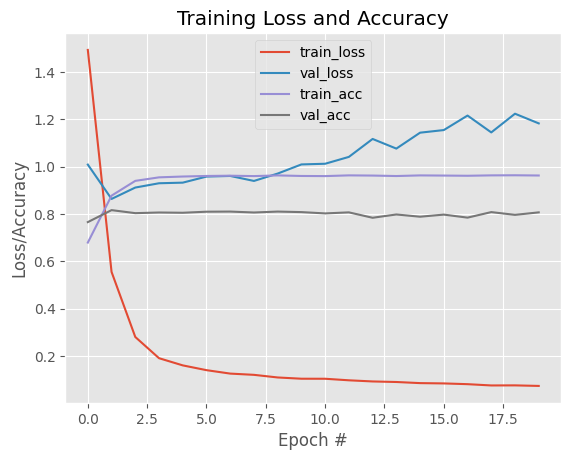

In [12]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [13]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test, batch_size=128) #TODO
loss, accuracy = model.evaluate(x_test,y_test) #TODO
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.2740 - accuracy: 0.7921
Loss 1.274001955986023, accuracy 0.7920747995376587


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [14]:
# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential()
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,)))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(46,activation='softmax')) #TODO - Reparto de la unidad de probabilidad entre num_classes

In [15]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam', #TODO
               loss='categorical_crossentropy', #TODO - Para clasificacion multiclase
               metrics=['accuracy'])

In [16]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 7ms/step - loss: 2.4156 - accuracy: 0.6351 - val_loss: 1.8284 - val_accuracy: 0.7012
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 1.7019 - accuracy: 0.7338 - val_loss: 1.7000 - val_accuracy: 0.7312
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 1.5960 - accuracy: 0.7528 - val_loss: 1.6231 - val_accuracy: 0.7407
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 1.5418 - accuracy: 0.7690 - val_loss: 1.6132 - val_accuracy: 0.7540
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4949 - accuracy: 0.7754 - val_loss: 1.6015 - val_accuracy: 0.7468
Epoch 6/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4745 - accuracy: 0.7800 - val_loss: 1.5633 - val_accuracy: 0.7724
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4400 - accuracy: 0.7889 - val_loss: 1.5492 - val_accuracy: 0.7602
Epoch 

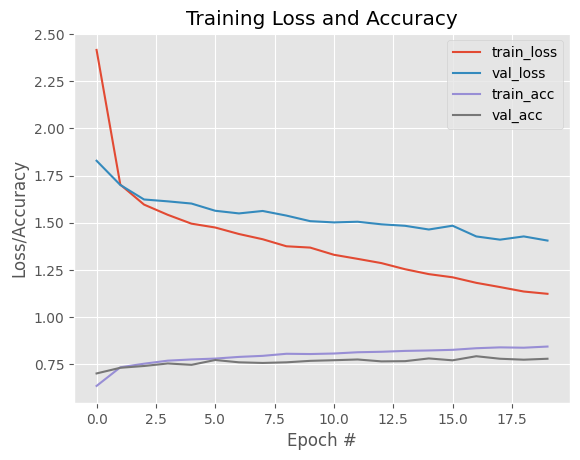

In [17]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [19]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test, batch_size=128) #TODO
loss, accuracy = model.evaluate(x_test,y_test) #TODO
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.2740 - accuracy: 0.7921
Loss 1.274001955986023, accuracy 0.7920747995376587


#### **- Dropout**

In [20]:
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential()
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,))) #TODO
#TODO Agregar capa dropout
model_reg.add(Dropout(0.5))
model_drop.add(Dense(64,activation='relu')) #TODO
#TODO Agregar capa dropout
model_reg.add(Dropout(0.5))
model_drop.add(Dense(46,activation='softmax')) # #TODO  - Reparto de la unidad de probabilidad entre num_classes

In [21]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam', #TODO
               loss='categorical_crossentropy', # #TODO - Para clasificacion multiclase
               metrics=['accuracy'])

In [22]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 6ms/step - loss: 1.4699 - accuracy: 0.6842 - val_loss: 0.9843 - val_accuracy: 0.7835
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.5643 - accuracy: 0.8733 - val_loss: 0.8741 - val_accuracy: 0.8141
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.2781 - accuracy: 0.9388 - val_loss: 0.8823 - val_accuracy: 0.8030
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1968 - accuracy: 0.9538 - val_loss: 0.9311 - val_accuracy: 0.7997
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1608 - accuracy: 0.9566 - val_loss: 0.9324 - val_accuracy: 0.8036
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1454 - accuracy: 0.9571 - val_loss: 0.9974 - val_accuracy: 0.7935
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1288 - accuracy: 0.9582 - val_loss: 0.9636 - val_accuracy: 0.8024
Epoch 

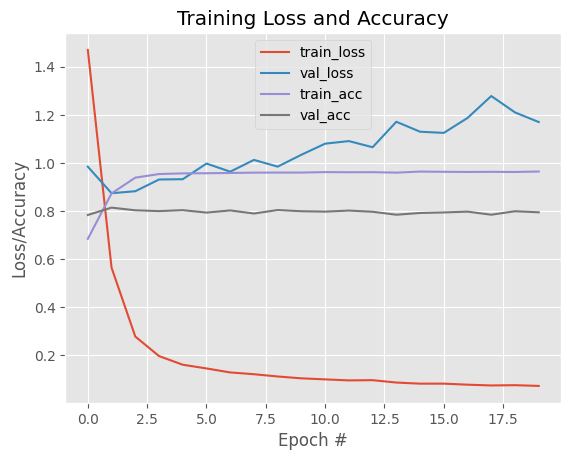

In [23]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# ¿Y si desconectamos mayor porcentaje de neuronas?

In [24]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test, batch_size=128) #TODO
loss, accuracy = model.evaluate(x_test,y_test) #TODO
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.2740 - accuracy: 0.7921
Loss 1.274001955986023, accuracy 0.7920747995376587


#### **- Batch Normalization**

In [25]:
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,))) #TODO
#TODO Agregar Batch normalization y dropout
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.5))
model_bn.add(Dense(64,activation='relu'))#TODO
#TODO Agregar Batch normalization y dropout
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.5))
model_bn.add(Dense(46,activation='softmax')) #TODO - Reparto de la unidad de probabilidad entre num_classes

In [26]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam', #TODO
               loss='categorical_crossentropy', # #TODO - Para clasificacion multiclase
               metrics=['accuracy'])

In [27]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 6ms/step - loss: 1.4778 - accuracy: 0.6832 - val_loss: 0.9767 - val_accuracy: 0.7858
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.5417 - accuracy: 0.8814 - val_loss: 0.8935 - val_accuracy: 0.8030
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.2633 - accuracy: 0.9431 - val_loss: 0.8608 - val_accuracy: 0.8125
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 0.1824 - accuracy: 0.9562 - val_loss: 0.9086 - val_accuracy: 0.8063
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1557 - accuracy: 0.9566 - val_loss: 0.9968 - val_accuracy: 0.7935
Epoch 6/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1418 - accuracy: 0.9573 - val_loss: 1.0517 - val_accuracy: 0.7935
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1280 - accuracy: 0.9592 - val_loss: 0.9246 - val_accuracy: 0.8158
Epoch 

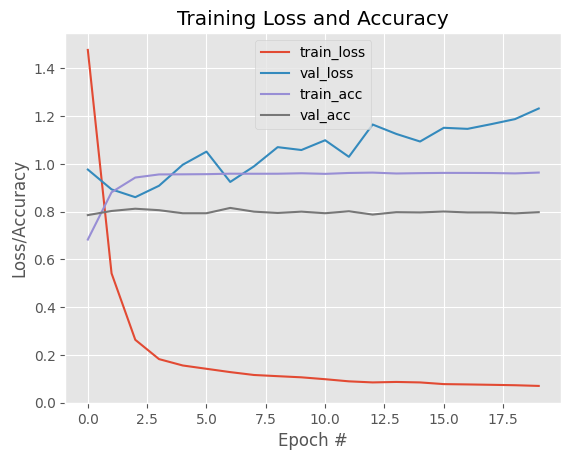

In [28]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [29]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test, batch_size=128) #TODO
loss, accuracy = model.evaluate(x_test,y_test) #TODO
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 5ms/step - loss: 1.2740 - accuracy: 0.7921
Loss 1.274001955986023, accuracy 0.7920747995376587
